## Let's use Polynomail and predict amount of co2 emissions :D

In [11]:
# import modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Read our data. 
Data = pd.read_csv('Data/FuelConsumption.csv')
Data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [3]:
# Selecte part of data that we want to use.
cdf = Data[["FUELCONSUMPTION_COMB_MPG","CO2EMISSIONS"]]
cdf

,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,33,196
1,29,221
2,48,136
3,25,255
4,27,244
...,...,...
1062,24,271
1063,25,264
1064,24,271
1065,25,260


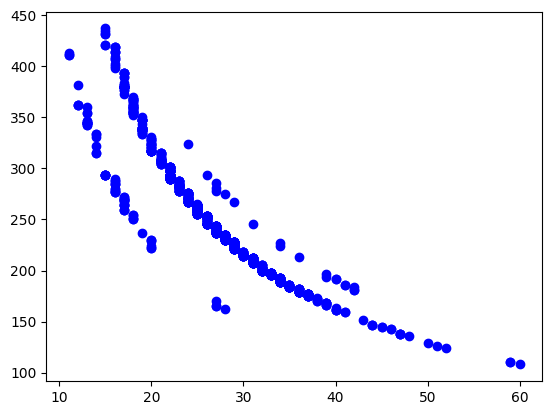

In [6]:
# Split train and test Data and get x and y for each of them.
train, test = train_test_split(cdf,test_size=0.2)

train_x = np.asanyarray(train[["FUELCONSUMPTION_COMB_MPG"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["FUELCONSUMPTION_COMB_MPG"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
plt.scatter(train_x,train_y, color="blue")


In [ ]:
# We create a 'LinearRegression' object.
reg = linear_model.LinearRegression()
# We create a 'PolynomialFeatures' object.
poly = PolynomialFeatures(degree=2)
# Get Poly features for 'train_x'.
poly_train_x = poly.fit_transform(train_x)
reg.fit(poly_train_x, train_y)


In [14]:
# Get Poly features for 'test_x'.
poly_test_x = poly.fit_transform(test_x)
# Now we will predict with test data and get the resulte.
resulte = reg.predict(poly_test_x)
print(r2_score(test_y, resulte))

0.8709823554261608


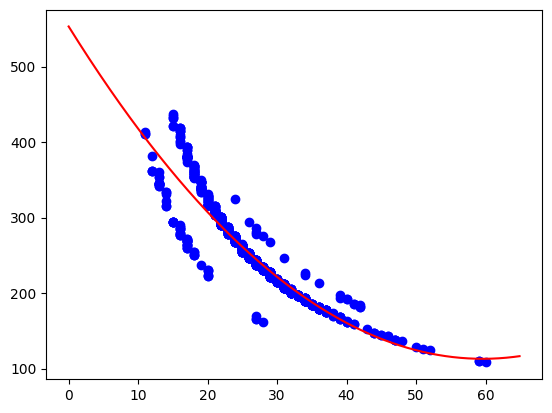

In [26]:
plt.scatter(train_x,train_y, color="blue")
X = np.arange(0.0, 65.0, 0.1)
y = reg.intercept_[0]+ reg.coef_[0][1]*X+ reg.coef_[0][2]*np.power(X, 2)
plt.plot(X, y, 'r')